# Analysis of Fatal Police Shootings in the USA

## Downloading data and their initial analysis

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

We begin with downloading the relevant breakdown of police fatalities in the US. We will look at some sample data collected in the table.

In [213]:
# Download database of US police fatalities and then load it into a DataFrame.
df = pd.read_csv('fatal_police_shootings_data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


The table above contains information about the victim's name and surname, date and manner of death, and information about the type of weaponry. Additional personal information collected in the table is: gender, race, age and city and state of the event. Details about the incident were also provided: whether the victim showed signs of mental illness, the risk of attack, and whether the victim tried to escape. There is also information whether the event was recorded.

## Race and signs of mental illness of victims

Using pivot tables, we will provide a summary of the relationship between race and whether the victim showed signs of mental illness.

In [217]:
# Reshape the table so that it shows the number of victims of the intervention by 'race'
# and whether they showed ‘signs_of_mental_illness’
df.pivot_table(values = 'id', index = 'signs_of_mental_illness', columns = 'race',aggfunc='count')

race,A,B,H,N,O,W
signs_of_mental_illness,,,,,,
False,69,1114,745,64,37,1763
True,24,184,157,14,11,713


Abbreviations
+ A - Asian
+ B - Black
+ H - Hispanic or Latino
+ N - Native Hawaiian/Pacific Islander
+ O - Other
+ W - White

In the next two tables, we will give a summary of the percentage of victims indicating signs of mental illness during the intervention. We will use the built-in crosstab function of the pandas library. We will present a vertical and horizontal version.



In [220]:
pd.crosstab(df['race'], df['signs_of_mental_illness'], values=df['id'], aggfunc=np.sum, normalize='index')


signs_of_mental_illness,False,True
race,,
A,0.769619,0.230381
B,0.872431,0.127569
H,0.846118,0.153882
N,0.831964,0.168036
O,0.792230,0.207770
W,0.735910,0.264090


In [221]:
pd.crosstab(df['signs_of_mental_illness'], df['race'], values=df['id'], aggfunc=np.sum, normalize='columns')
# A horizonthal version

race,A,B,H,N,O,W
signs_of_mental_illness,,,,,,
False,0.769619,0.872431,0.846118,0.831964,0.79223,0.73591
True,0.230381,0.127569,0.153882,0.168036,0.20777,0.26409


Conclusion: the highest percentage of victims showing symptoms of mental illness is among Caucasians (26.4%).

## Number of victims and day of the week

In this section, we will present a bar chart of the number of incidents depending on the day of the week.
We will use the calendar and matplotlit.pyplot libraries

<BarContainer object of 7 artists>

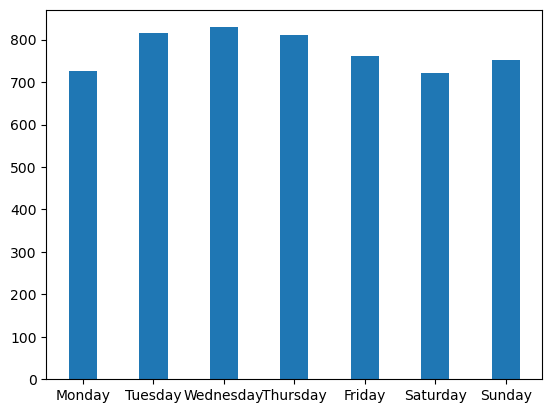

In [225]:
# Add a column indicating the day of the week on which the intervention occurred.
# Count interventions by corresponding day of the week.
# Then create a column chart,
# so that the days of the week are arranged from Monday to Sunday.

from calendar import day_name
import matplotlib.pyplot as plt
# adding the column
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
# entering the names of the days of the week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=cats, ordered=True)
df = df.sort_values('day_name')
# count the days of the week
df.groupby('day_name')['id'].count()
# a bar plot
plt.bar(cats, df.groupby('day_name')['id'].count(),
        width = 0.4)



## Number of fatal interventions per 1,000 inhabitants for individual states



In the last part, we will analyze the number of incidents per 1,000 inhabitants in individual states.
This measure is definitely better than the absolute value of the number of incidents,
because it takes into account the number of inhabitants of a given state.

Event status data is provided in abbreviated form,
hence the need to connect the available database with the database containing the explanation of this abbreviation.

The next steps will be explained in the comments included in the code.

In [228]:
# Load population data for individual US states into the project and
# data regarding abbreviations of individual states.
# Connect these databases in such a way that you can count how many incidents there are in the database
# regarding fatal interventions occurred per 1,000 inhabitants of each state.
# ------------------------------------------------- ------
# Count the number of incidents and change the column name

df_by_state = df.groupby('state')['id'].count()
df_by_state.rename_axis("Abbreviation" ,inplace=True)

In [229]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
tables = pd.read_html(url, header=0)

# Check the number of tables
print(f"Number of tables found: {len(tables)}")

Number of tables found: 21


In [230]:
# Loop through the tables
for i, table in enumerate(tables):
    print(f"Table {i}")
    print(table.head())
    print("\n")


Table 0
                 This article is part of a series on
0           Political divisions of the United States
1                                        First level
2  State (Commonwealth) Federal district Territor...
3                                       Second level
4  County / Parish / Borough Unorganized Borough ...


Table 1
   Flag, name and postal abbreviation[8]  \
0  Flag, name and postal abbreviation[8]   
1                                Alabama   
2                                 Alaska   
3                                Arizona   
4                               Arkansas   

  Flag, name and postal abbreviation[8].1       Cities     Cities.1  \
0   Flag, name and postal abbreviation[8]      Capital  Largest[12]   
1                                      AL   Montgomery   Huntsville   
2                                      AK       Juneau    Anchorage   
3                                      AZ      Phoenix      Phoenix   
4                                      AR  L

In [231]:
desired_table = tables[1]  

In [232]:
print(desired_table.columns)

Index(['Flag, name and postal abbreviation[8]',
       'Flag, name and postal abbreviation[8].1', 'Cities', 'Cities.1',
       'Ratification or admission[A]', 'Population (2020)[10]',
       'Total area[11]', 'Total area[11].1', 'Reps.'],
      dtype='object')


In [233]:
print(desired_table['Flag, name and postal abbreviation[8].1'].head())


0    Flag, name and postal abbreviation[8]
1                                       AL
2                                       AK
3                                       AZ
4                                       AR
Name: Flag, name and postal abbreviation[8].1, dtype: object


In [234]:
# Rename the columns
desired_table.rename(columns={
    'Flag, name and postal abbreviation[8]': 'Name',
    'Flag, name and postal abbreviation[8].1': 'Abbreviation',
    'Population (2020)[10]': 'Population'
}, inplace=True)


In [235]:
desired_table.head()

,Name,Abbreviation,Cities,Cities.1,Ratification or admission[A],Population,Total area[11],Total area[11].1,Reps.
0,"Flag, name and postal abbreviation[8]","Flag, name and postal abbreviation[8]",Capital,Largest[12],Ratification or admission[A],Population (2020)[10],mi2,km2,Reps.
1,Alabama,AL,Montgomery,Huntsville,"Dec 14, 1819",5024279,52420,135767,7
2,Alaska,AK,Juneau,Anchorage,"Jan 3, 1959",733391,665384,1723337,1
3,Arizona,AZ,Phoenix,Phoenix,"Feb 14, 1912",7151502,113990,295234,9
4,Arkansas,AR,Little Rock,Little Rock,"Jun 15, 1836",3011524,53179,137732,4


In [236]:
# Retain only the necessary columns
desired_table = desired_table[['Name', 'Abbreviation', 'Population']]

# Display the cleaned table
print(desired_table.head())

                                    Name  \
0  Flag, name and postal abbreviation[8]   
1                                Alabama   
2                                 Alaska   
3                                Arizona   
4                               Arkansas   

                            Abbreviation             Population  
0  Flag, name and postal abbreviation[8]  Population (2020)[10]  
1                                     AL                5024279  
2                                     AK                 733391  
3                                     AZ                7151502  
4                                     AR                3011524  


In [237]:
desired_table = desired_table.iloc[1:].reset_index(drop=True)

In [238]:
print(desired_table.head())

         Name Abbreviation Population
0     Alabama           AL    5024279
1      Alaska           AK     733391
2     Arizona           AZ    7151502
3    Arkansas           AR    3011524
4  California           CA   39538223


In [239]:
# Setting col names to object
col_name_state = desired_table.columns[0]  # 'Name'
col_name_abv = desired_table.columns[1]  # 'Abbreviation'

# Rename columns for consistency
desired_table.rename(columns={col_name_state: 'State', col_name_abv: 'Abbreviation'}, inplace=True)

# Keep only the necessary columns
abv_states = desired_table[['State', 'Abbreviation']].sort_values(by='State')




In [240]:
# Merge with population data (assuming pop_states is a DataFrame with 'State' and 'Population' columns)
df_pop_partial = pd.merge(pop_states, abv_states, how='inner', on='State')

# Merge with incident data (assuming df_by_state has 'Abbreviation' and 'id' columns for incidents)
df_pop = pd.merge(df_pop_partial, df_by_state, how='inner', on='Abbreviation')

# Add a column for incidents per 1000 inhabitants
df_pop['Per 1000'] = (df_pop['id'] / df_pop['Population']) * 1000

# Display the final DataFrame
df_pop

,State,Population,Abbreviation,id,Per 1000
0,Alabama,5024279,AL,104,0.020699
1,Alaska,733391,AK,39,0.053178
2,Arizona,7151502,AZ,254,0.035517
3,Arkansas,3011524,AR,83,0.027561
4,California,39538223,CA,799,0.020208
5,Colorado,5773714,CO,195,0.033774
6,Connecticut,3605944,CT,21,0.005824
7,Delaware,989948,DE,13,0.013132
8,Florida,21538187,FL,350,0.016250
9,Georgia,10711908,GA,182,0.016990


In [241]:
df_pop['Per 1000'].max()

0.05317763648585815

Conclusion: The highest number of incidents per 1,000 inhabitants is in Alaska and is 0.0053.

